## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [11]:
#importing

from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from prettytable import PrettyTable    

In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

 <h3>  1.1)MLP with 2 hidden layers + Relu + BatchNormalisation +Dropout+ AdamOpltimizer</h3>

In [14]:
model_relu = Sequential()
#Let's take dimension of first and second hidden layer 400 and 250 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h2 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)

model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.089, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               100250    
_________________________________________________________________
batch_normalization_4 (Batch (None, 250)               1000      
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2510      
Total para

In [15]:
#Applying adam optimizer
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

W0804 15:39:09.342900  6892 deprecation_wrapper.py:119] From C:\Users\Hi\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 15:39:10.184588  6892 deprecation.py:323] From C:\Users\Hi\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 34s 572us/step - loss: 0.4713 - acc: 0.8576 - val_loss: 0.1440 - val_acc: 0.9551
Epoch 2/20
60000/60000 [==============================] - 26s 427us/step - loss: 0.2234 - acc: 0.9323 - val_loss: 0.1106 - val_acc: 0.9661
Epoch 3/20
60000/60000 [==============================] - 26s 430us/step - loss: 0.1717 - acc: 0.9467 - val_loss: 0.0978 - val_acc: 0.9700
Epoch 4/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.1457 - acc: 0.9557 - val_loss: 0.0834 - val_acc: 0.9739
Epoch 5/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.1289 - acc: 0.9608 - val_loss: 0.0761 - val_acc: 0.9760
Epoch 6/20
60000/60000 [==============================] - 25s 423us/step - loss: 0.1160 - acc: 0.9641 - val_loss: 0.0728 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.1060 - acc: 0.9669 - val_loss: 0.

Test score: 0.05540496020909195
Test accuracy: 0.9839


<IPython.core.display.Javascript object>


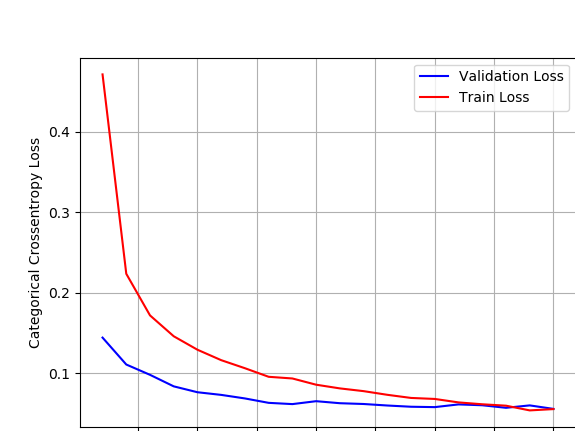

In [16]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


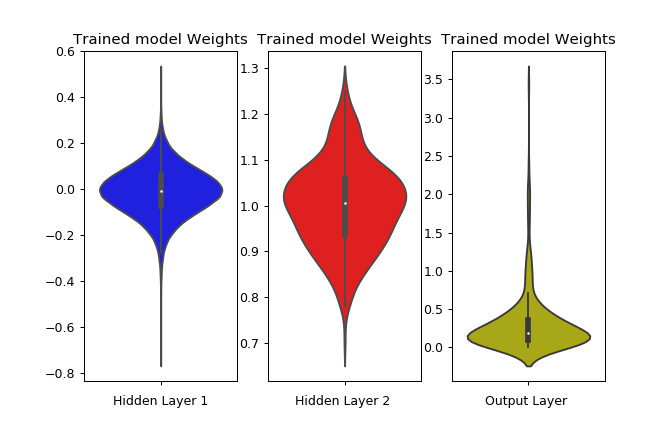

In [17]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  1.2)MLP with 2 hidden layers + Relu +  AdamOpltimizer(WithoutBatchNormalisation,Without dropout)</h3>

In [25]:
model_relu = Sequential()
#Let's take dimension of first and second hidden layer 400 and 250 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h2 =>  σ=√(2/(fan_in) = 0.089  => N(0,σ) = N(0,0.089)

model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_relu.add(Dense(250, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.089, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_15 (Dense)             (None, 250)               100250    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                2510      
Total params: 416,760
Trainable params: 416,760
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Applying adam optimizer
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.2348 - acc: 0.9305 - val_loss: 0.1079 - val_acc: 0.9656
Epoch 2/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.0862 - acc: 0.9738 - val_loss: 0.0815 - val_acc: 0.9747
Epoch 3/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0524 - acc: 0.9835 - val_loss: 0.0708 - val_acc: 0.9776
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0353 - acc: 0.9889 - val_loss: 0.0574 - val_acc: 0.9824
Epoch 5/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0268 - acc: 0.9908 - val_loss: 0.0736 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0190 - acc: 0.9940 - val_loss: 0.0690 - val_acc: 0.9804
Epoch 7/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0156 - acc: 0.9949 - val_loss: 0.0756 - 

Test score: 0.08285639366751603
Test accuracy: 0.9835


<IPython.core.display.Javascript object>


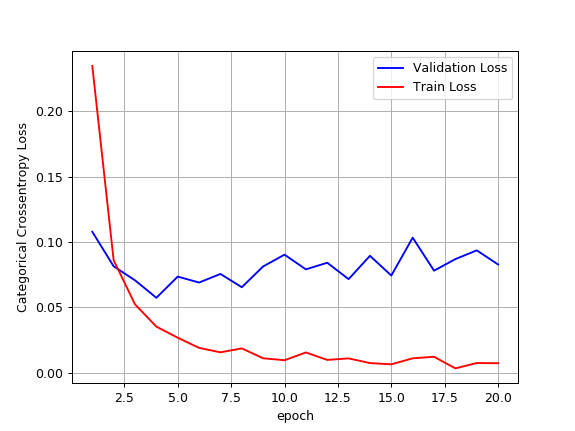

In [27]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


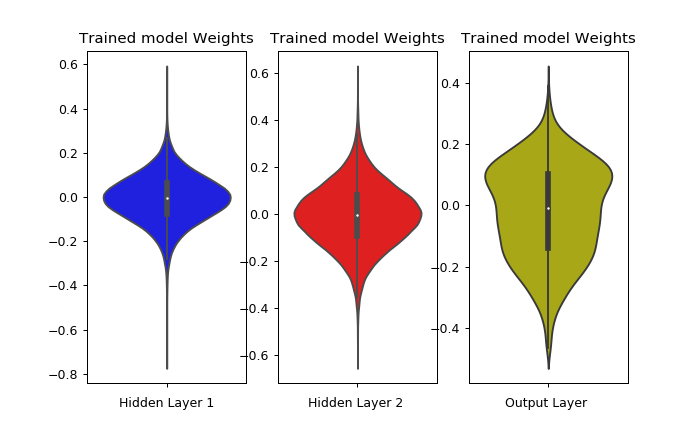

In [28]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  2.1)MLP with 3 hidden layers + Relu + BatchNormalisation+Dropout + AdamOpltimizer</h3>

In [18]:
model_relu = Sequential()
#Let's take dimension of first, second and third hidden layer 480, 280 and 80 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.064  => N(0,σ) = N(0,0.064)
# h2 =>  σ=√(2/(fan_in) = 0.084  => N(0,σ) = N(0,0.084)
# h3 =>  σ=√(2/(fan_in) = 0.158  => N(0,σ) = N(0,0.158)

model_relu.add(Dense(480, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.064, seed=None)))
model_relu.add(Dropout(0.5))
model_relu.add(BatchNormalization())

model_relu.add(Dense(280, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.084, seed=None)) )
model_relu.add(Dropout(0.5))

model_relu.add(Dense(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.158, seed=None)) )
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 480)               376800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 480)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 480)               1920      
_________________________________________________________________
dense_8 (Dense)              (None, 280)               134680    
_________________________________________________________________
dropout_6 (Dropout)          (None, 280)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 80)                22480     
_________________________________________________________________
dropout_7 (Dropout)          (None, 80)                0         
__________

In [19]:
#Applying adam optimizer
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 405us/step - loss: 1.3775 - acc: 0.6410 - val_loss: 0.2898 - val_acc: 0.9212
Epoch 2/20
60000/60000 [==============================] - 31s 517us/step - loss: 0.5014 - acc: 0.8528 - val_loss: 0.1975 - val_acc: 0.9427
Epoch 3/20
60000/60000 [==============================] - 35s 587us/step - loss: 0.3625 - acc: 0.8976 - val_loss: 0.1517 - val_acc: 0.9554
Epoch 4/20
60000/60000 [==============================] - 31s 513us/step - loss: 0.2964 - acc: 0.9192 - val_loss: 0.1333 - val_acc: 0.9603
Epoch 5/20
60000/60000 [==============================] - 32s 528us/step - loss: 0.2493 - acc: 0.9306 - val_loss: 0.1180 - val_acc: 0.9636
Epoch 6/20
60000/60000 [==============================] - 33s 553us/step - loss: 0.2262 - acc: 0.9384 - val_loss: 0.1123 - val_acc: 0.9674
Epoch 7/20
60000/60000 [==============================] - 32s 536us/step - loss: 0.2018 - acc: 0.9448 - val_loss: 0.

Test score: 0.0738352784443341
Test accuracy: 0.9809


<IPython.core.display.Javascript object>


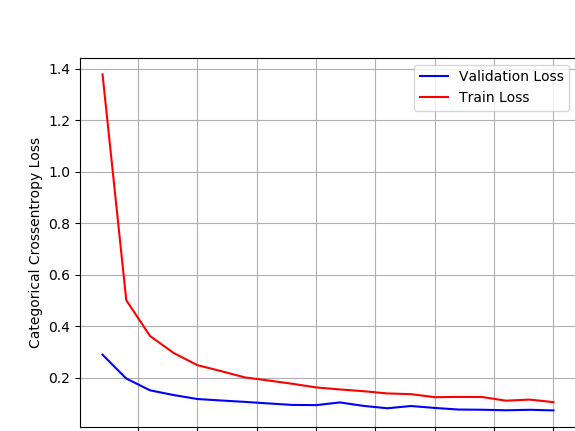

In [20]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


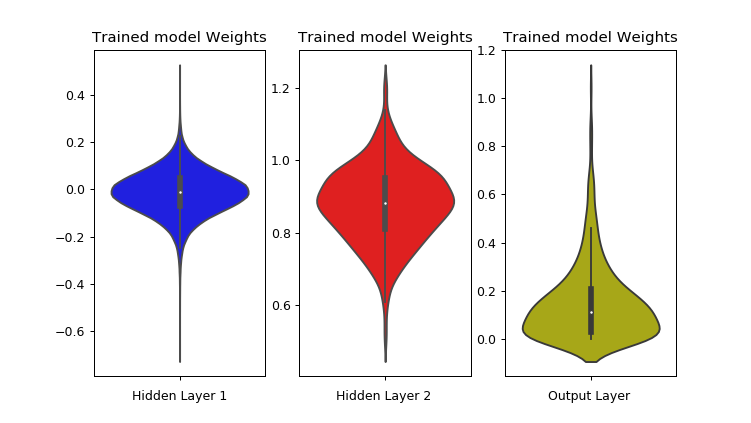

In [21]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  2.2)MLP with 3 hidden layers + Relu +  AdamOpltimizer(WithoutBatchNormalisation,Without dropout)</h3>

In [29]:
model_relu = Sequential()
#Let's take dimension of first, second and third hidden layer 480, 280 and 80 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.064  => N(0,σ) = N(0,0.064)
# h2 =>  σ=√(2/(fan_in) = 0.084  => N(0,σ) = N(0,0.084)
# h3 =>  σ=√(2/(fan_in) = 0.158  => N(0,σ) = N(0,0.158)

model_relu.add(Dense(480, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.064, seed=None)))

model_relu.add(Dense(280, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.084, seed=None)) )

model_relu.add(Dense(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.158, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 480)               376800    
_________________________________________________________________
dense_18 (Dense)             (None, 280)               134680    
_________________________________________________________________
dense_19 (Dense)             (None, 80)                22480     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                810       
Total params: 534,770
Trainable params: 534,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
#Applying adam optimizer
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 205us/step - loss: 0.2225 - acc: 0.9318 - val_loss: 0.1375 - val_acc: 0.9572
Epoch 2/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0835 - acc: 0.9741 - val_loss: 0.0897 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.0514 - acc: 0.9833 - val_loss: 0.0896 - val_acc: 0.9724
Epoch 4/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0386 - acc: 0.9873 - val_loss: 0.0933 - val_acc: 0.9731
Epoch 5/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.0288 - acc: 0.9906 - val_loss: 0.0727 - val_acc: 0.9804
Epoch 6/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0218 - acc: 0.9930 - val_loss: 0.0835 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 11s 191us/step - loss: 0.0216 - acc: 0.9930 - val_loss: 0.

Test score: 0.09616601888963419
Test accuracy: 0.9786


<IPython.core.display.Javascript object>


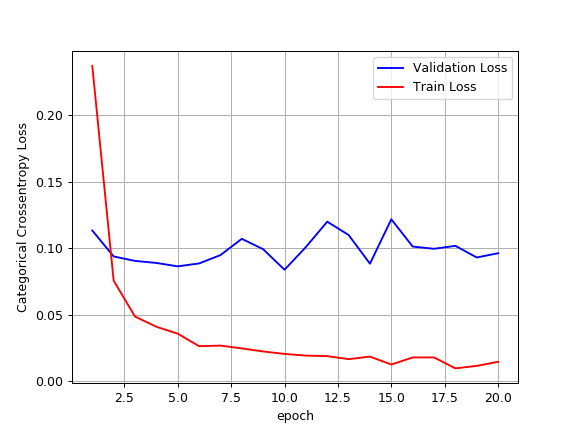

In [19]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


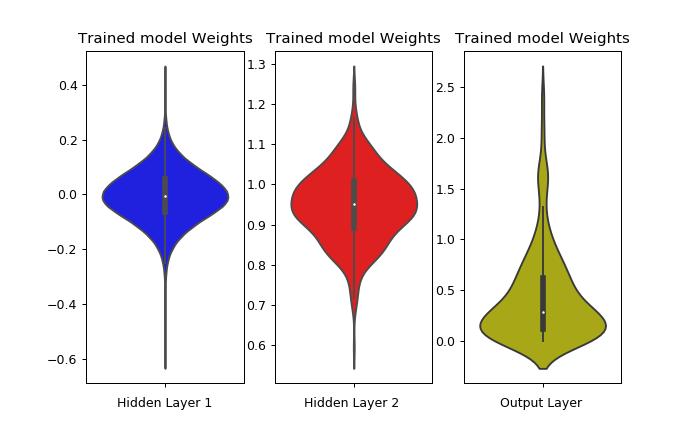

In [20]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  3.1)MLP with 5 hidden layers + Relu + BatchNormalisation +Dropout+ AdamOpltimizer</h3>

In [22]:
model_relu = Sequential()
#Let's take dimension of first, second,third,fourth and fifth hidden layer 650,550,400,200 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.055  => N(0,σ) = N(0,0.055)
# h2 =>  σ=√(2/(fan_in) = 0.060  => N(0,σ) = N(0,0.060)
# h3 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h4 =>  σ=√(2/(fan_in) = 0.1  => N(0,σ) = N(0,0.1)
# h5 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)

model_relu.add(Dense(650, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, seed=None)))
model_relu.add(Dropout(0.5))

model_relu.add(Dense(550, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.060, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)) )
model_relu.add(Dropout(0.5))

model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 650)               510250    
_________________________________________________________________
dropout_8 (Dropout)          (None, 650)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 550)               358050    
_________________________________________________________________
batch_normalization_6 (Batch (None, 550)               2200      
_________________________________________________________________
dropout_9 (Dropout)          (None, 550)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 400)               220400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 400)               0         
__________

In [23]:
#Applying adam optimizer
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 44s 731us/step - loss: 1.6782 - acc: 0.5578 - val_loss: 0.3243 - val_acc: 0.9075
Epoch 2/20
60000/60000 [==============================] - 40s 668us/step - loss: 0.4796 - acc: 0.8577 - val_loss: 0.1773 - val_acc: 0.9468
Epoch 3/20
60000/60000 [==============================] - 30s 493us/step - loss: 0.3129 - acc: 0.9120 - val_loss: 0.1405 - val_acc: 0.9598
Epoch 4/20
60000/60000 [==============================] - 41s 682us/step - loss: 0.2509 - acc: 0.9321 - val_loss: 0.1210 - val_acc: 0.9663
Epoch 5/20
60000/60000 [==============================] - 35s 579us/step - loss: 0.2115 - acc: 0.9434 - val_loss: 0.1080 - val_acc: 0.9698
Epoch 6/20
60000/60000 [==============================] - 40s 673us/step - loss: 0.1874 - acc: 0.9506 - val_loss: 0.1018 - val_acc: 0.9710
Epoch 7/20
60000/60000 [==============================] - 46s 767us/step - loss: 0.1670 - acc: 0.9552 - val_loss: 0.

Test score: 0.07039678009253549
Test accuracy: 0.9829


<IPython.core.display.Javascript object>


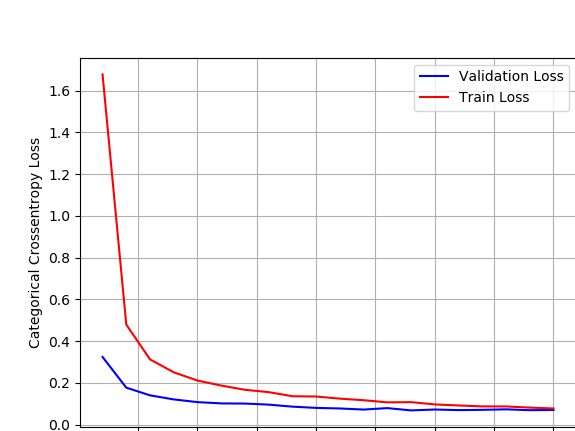

In [24]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


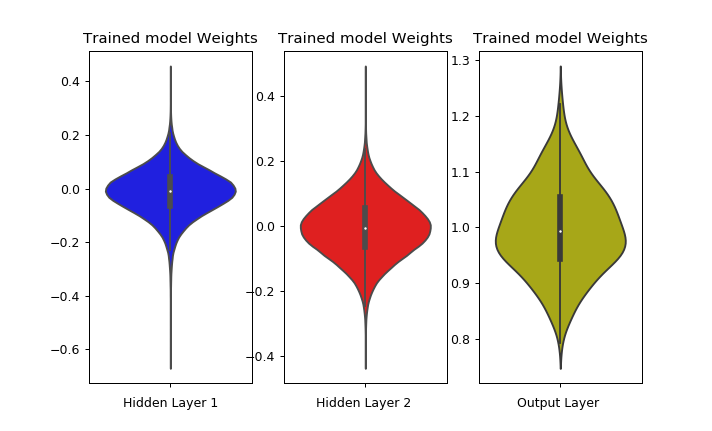

In [25]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

 <h3>  3.2)MLP with 2 hidden layers + Relu +  AdamOpltimizer(WithoutBatchNormalisation,Without dropout)</h3>

In [21]:
model_relu = Sequential()
#Let's take dimension of first, second,third,fourth and fifth hidden layer 650,550,400,200 and 100 respectively
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.055  => N(0,σ) = N(0,0.055)
# h2 =>  σ=√(2/(fan_in) = 0.060  => N(0,σ) = N(0,0.060)
# h3 =>  σ=√(2/(fan_in) = 0.070  => N(0,σ) = N(0,0.070)
# h4 =>  σ=√(2/(fan_in) = 0.1  => N(0,σ) = N(0,0.1)
# h5 =>  σ=√(2/(fan_in) = 0.141  => N(0,σ) = N(0,0.141)

model_relu.add(Dense(650, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, seed=None)))

model_relu.add(Dense(550, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.060, seed=None)) )

model_relu.add(Dense(400, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)) )

model_relu.add(Dense(200, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )

model_relu.add(Dense(100, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.141, seed=None)) )

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 650)               510250    
_________________________________________________________________
dense_9 (Dense)              (None, 550)               358050    
_________________________________________________________________
batch_normalization_4 (Batch (None, 550)               2200      
_________________________________________________________________
dense_10 (Dense)             (None, 400)               220400    
_________________________________________________________________
dense_11 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
dense_12 (Dense)             (None, 100)               20100     
__________

In [22]:
#Applying adam optimizer
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.2085 - acc: 0.9375 - val_loss: 0.1278 - val_acc: 0.9608
Epoch 2/20
60000/60000 [==============================] - 20s 330us/step - loss: 0.0881 - acc: 0.9732 - val_loss: 0.0956 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 20s 330us/step - loss: 0.0612 - acc: 0.9807 - val_loss: 0.0983 - val_acc: 0.9704
Epoch 4/20
60000/60000 [==============================] - 20s 333us/step - loss: 0.0505 - acc: 0.9839 - val_loss: 0.1061 - val_acc: 0.9701
Epoch 5/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.0462 - acc: 0.9847 - val_loss: 0.1037 - val_acc: 0.9705
Epoch 6/20
60000/60000 [==============================] - 27s 446us/step - loss: 0.0383 - acc: 0.9876 - val_loss: 0.0902 - val_acc: 0.9744
Epoch 7/20
60000/60000 [==============================] - 28s 460us/step - loss: 0.0342 - acc: 0.9886 - val_loss: 0.

Test score: 0.09663725952169334
Test accuracy: 0.9769


<IPython.core.display.Javascript object>


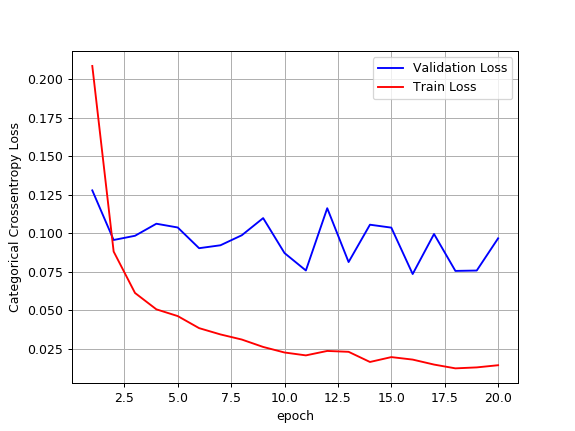

In [23]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


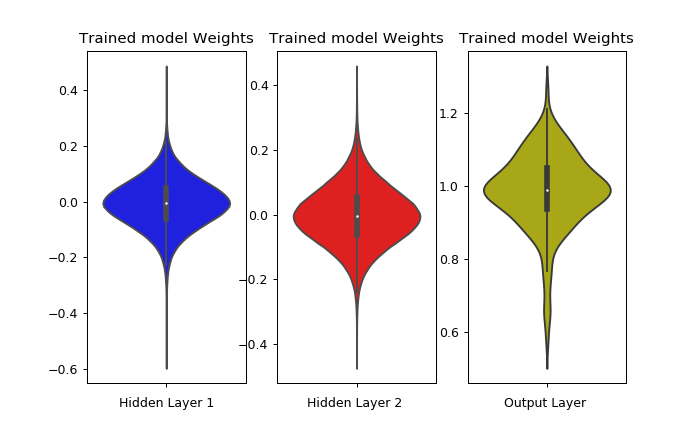

In [24]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [32]:
x = PrettyTable()
x.field_names = ["No of layer","Dropout&normalizationused", "Accuracy"]
x.add_row(["2","Yes","0.9839"])
x.add_row(["2","No","0.9835"])
x.add_row(["2","Yes","0.9809"])
x.add_row(["3","No","0.9786"])
x.add_row(["3","Yes","0.9829"])
x.add_row(["5","NO","0.9769"])

print(x)

+-------------+---------------------------+----------+
| No of layer | Dropout&normalizationused | Accuracy |
+-------------+---------------------------+----------+
|      2      |            Yes            |  0.9839  |
|      2      |             No            |  0.9835  |
|      2      |            Yes            |  0.9809  |
|      3      |             No            |  0.9786  |
|      3      |            Yes            |  0.9829  |
|      5      |             NO            |  0.9769  |
+-------------+---------------------------+----------+


<b>Conclusion</b>

   By the above table we can infer that adding dropouts and by batchnormalizing,performance of the model increases